<a href="https://colab.research.google.com/github/CaioCarvalho144/Cases-DNC/blob/main/An%C3%A1lise_DNC_1_(house_rent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
aluguel_casas = pd.read_excel("/content/houses_rent.xlsx")

In [ ]:
aluguel_casas.head(10)

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200,42,28,2270
6,6,Barcelona,55,1,1,1,2,accept,furnished,1950,5000,375,64,7389
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300,67,17,1984
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000,109,26,2963
9,9,Barcelona,32,1,1,1,16,accept,not furnished,533,2900,0,37,3470


In [ ]:
aluguel_casas = aluguel_casas.rename(columns={"parking spaces":"parking_spaces","rent amount":"rent_amount","property tax":"property_tax","fire insurance":"fire_insurance"})
aluguel_casas.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [ ]:
aluguel_casas.dtypes

,0
index,int64
city,object
area,int64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


In [ ]:
aluguel_casas.astype({"rent_amount":"float64","property_tax":"float64","fire_insurance":"float64","total":"float64"}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


In [ ]:
aluguel_casas[["area","rooms","bathroom","parking_spaces","rent_amount","property_tax","fire_insurance","total"]].describe()

,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


In [ ]:
# Filtro
aluguel_casas[(aluguel_casas["total"]<=4000) & (aluguel_casas["animal"]=='accept') & ((aluguel_casas["rooms"]==2)|(aluguel_casas["rooms"]==3))]

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300,67,17,1984
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000,109,26,2963
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950,11,13,1319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058,6058,Barcelona,72,2,1,1,4,accept,not furnished,860,1440,0,19,2319
6059,6059,Barcelona,59,2,1,1,10,accept,not furnished,589,1500,0,20,2109
6065,6065,Barcelona,133,2,2,1,7,accept,not furnished,813,2713,160,35,3721
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585


In [ ]:
aluguel_casas = aluguel_casas.query("total <= 4000 and animal  == 'accept' and rooms in (2,3)")

In [ ]:
# Agrupar
agrupar_city = aluguel_casas.groupby(["city"])["total"].agg("mean").reset_index()
agrupar_city

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


In [ ]:
agrupar_ban_room = aluguel_casas.groupby(["rooms","bathroom"])["total"].agg("mean").reset_index()
agrupar_ban_room

,rooms,bathroom,total
0,2,1,2091.175221
1,2,2,2734.612903
2,2,3,3057.440000
3,2,4,3136.000000
4,3,1,2542.509091
5,3,2,2928.720395
6,3,3,3217.704545
7,3,4,3461.133333
8,3,5,3245.000000
9,3,6,3101.000000


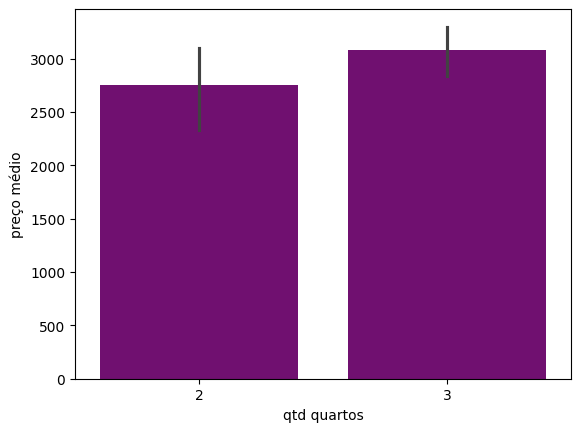

In [ ]:
# Gráfico de barra
barra=sns.barplot(data = agrupar_ban_room, x="rooms",y="total",color = "purple");
barra.set(xlabel = "qtd quartos",ylabel= "preço médio");

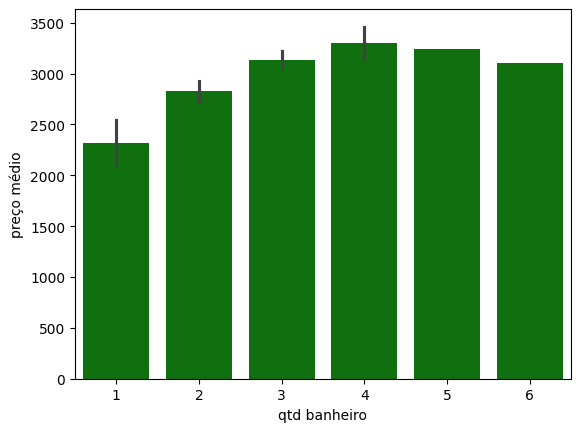

In [ ]:
barra1=sns.barplot(data = agrupar_ban_room, x="bathroom",y="total",color = "green");
barra1.set(xlabel = "qtd banheiro",ylabel= "preço médio");

In [ ]:
agrupar_area = aluguel_casas[["area"]]
agrupar_area = agrupar_area.query("area <=100")

<Axes: xlabel='area', ylabel='Count'>

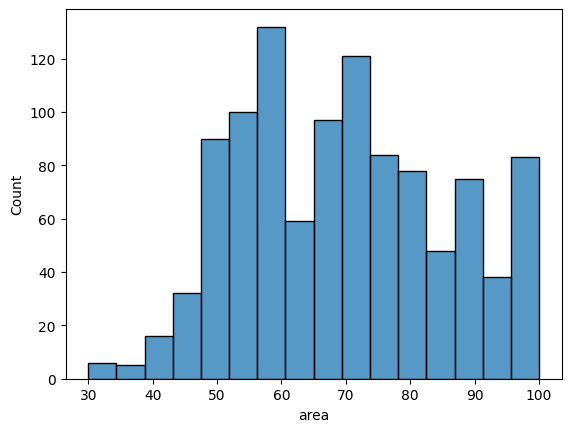

In [ ]:
# Histograma
sns.histplot(data=agrupar_area,x="area")

<Axes: xlabel='total', ylabel='Count'>

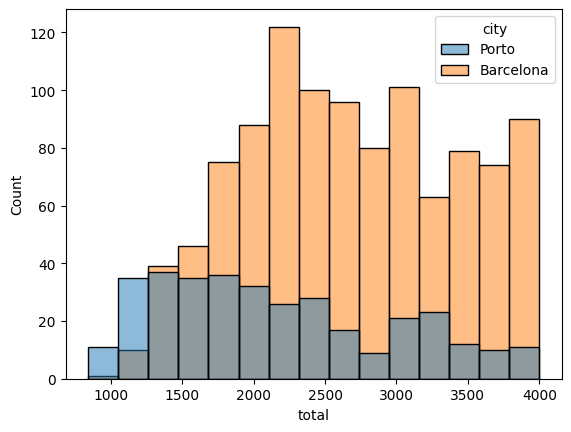

In [ ]:
sns.histplot(data=aluguel_casas,x="total",hue = "city")

In [ ]:
#selecionei a cidade do porto
aluguel_casas = aluguel_casas.query("city == 'Porto'")

In [ ]:
agrupar_floor = aluguel_casas.groupby(["floor"]).index.nunique().sort_values(ascending=False)
agrupar_floor

,index
floor,
-,77
1,52
3,51
2,31
4,26
7,20
5,16
6,13
11,11


In [ ]:
agrupar_floor_price = aluguel_casas.groupby(["floor"])["total"].agg("mean").reset_index()
agrupar_floor_price


,floor,total
0,1,2004.096154
1,2,1745.322581
2,3,1709.921569
3,4,1872.923077
4,5,2385.812500
5,6,2331.307692
6,7,2340.750000
7,8,2744.714286
8,9,2941.111111
9,10,1946.666667


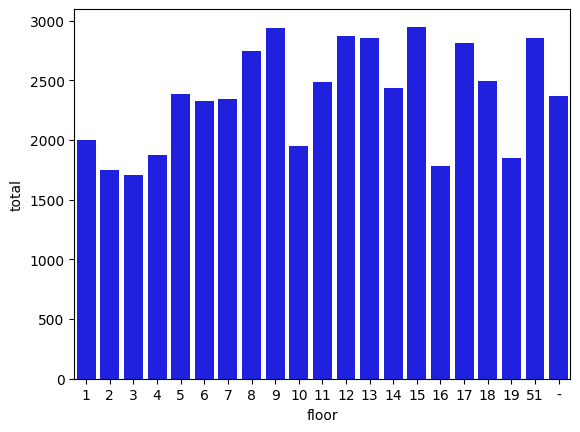

In [ ]:
sns.barplot(data=agrupar_floor_price,x="floor",y="total",color = "blue");

In [ ]:
aluguel_casas = aluguel_casas.query("floor == 16")
aluguel_casas

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900,61,12,1523
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200,89,16,2035
